 # News Articles Analysis 

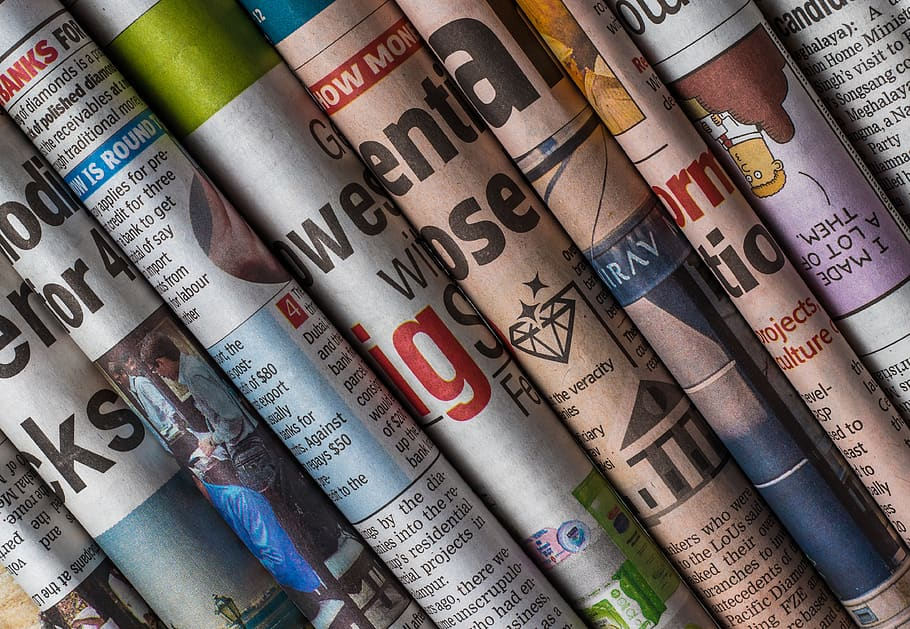

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Data Preproccessing](#chapter6)
* <b>[7. Train-test splits](#chapter7)
* <b>[8. Conclusion](#chapter8)</b>
* <b>[9. References](#chapter9)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>


+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [216]:
# Importing packages for data manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

In [217]:
# Necessary Libraries
import nltk

### Downloading NLTK corpora

In [218]:
from nltk.corpus import stopwords

In [219]:
import string

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [220]:
# loading dataset
import pandas as pd
train_df = pd.read_csv("Data\\train.csv")

test_df = pd.read_csv("Data\\test.csv")


To prevent any major unnecessary changes occurring to the original data , a copy of the dataframe was made using the df.copy() method and referred to as df_copy

In [221]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

## 4.Data Cleaning <a class="anchor" id="chapter4"></a>

### Train Data Cleaning

In [222]:
train_df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


Check for the columns in the Dataframe and Shape

In [223]:
# Check the columns of the DataFrame
print(train_df_copy.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [224]:
train_df_copy.shape

(5520, 5)

In [225]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [226]:
# Checking for duplicates
duplicates = train_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [227]:
# Check for Unique Values
unique_values = train_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      5512
description    5508
content        5513
url            5514
category          5
dtype: int64


In [228]:
# Check for Missing Values/Nulls
missing_values = train_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### Removing stop words

In [229]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [230]:
# Function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return text

In [231]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
train_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


### Remove punctuation

First we make all the text lowercase to remove some noise from capitalisation.

In [232]:
train_df_copy['headlines'] = train_df_copy['headlines'].str.lower()
train_df_copy['description'] = train_df_copy['description'].str.lower()
train_df_copy['content'] = train_df_copy['content'].str.lower()
train_df_copy['url'] = train_df_copy['url'].str.lower()
train_df_copy['category'] = train_df_copy['category'].str.lower()

Now let's remove the punctuation using the `string` import.

In [233]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [234]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [235]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
train_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


### Removing noise

In [236]:
# Replace URLs in the 'url' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df_copy['url'] = train_df_copy['url'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [237]:
train_df_copy.head()

,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


## Tokenization

In [238]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


train_df_copy = train_df_copy.apply(tokenize_text)

print(train_df_copy)


                                              headlines  \
0     rbi revises definition of politicallyexposed p...   
1     ndtv q2 net profit falls 574 to rs 555 crore i...   
2     akasa air ‘well capitalised’ can grow much fas...   
3     india’s current account deficit declines sharp...   
4     states borrowing cost soars to 768 highest so ...   
...                                                 ...   
5515  samsung sends out invites for ‘unpacked 2024’ ...   
5516  google pixel 8 pro accidentally appears on off...   
5517  amazon ad on google search redirects users to ...   
5518  elon musk’s x previously twitter now worth les...   
5519  apple’s ios 172 update released and here’s how...   

                                            description  \
0     the central bank has also asked chairpersons a...   
1     ndtvs consolidated revenue from operations was...   
2     the initial share sale will be open for public...   
3     the current account deficit cad was 38 per cen...

### Stemming

In [239]:
import pandas as pd
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
df_stemmed = train_df_copy.applymap(stem_text)

print(train_df_copy)

                                              headlines  \
0     rbi revises definition of politicallyexposed p...   
1     ndtv q2 net profit falls 574 to rs 555 crore i...   
2     akasa air ‘well capitalised’ can grow much fas...   
3     india’s current account deficit declines sharp...   
4     states borrowing cost soars to 768 highest so ...   
...                                                 ...   
5515  samsung sends out invites for ‘unpacked 2024’ ...   
5516  google pixel 8 pro accidentally appears on off...   
5517  amazon ad on google search redirects users to ...   
5518  elon musk’s x previously twitter now worth les...   
5519  apple’s ios 172 update released and here’s how...   

                                            description  \
0     the central bank has also asked chairpersons a...   
1     ndtvs consolidated revenue from operations was...   
2     the initial share sale will be open for public...   
3     the current account deficit cad was 38 per cen...

## Lemmatization 

In [240]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply lemmatization to the entire DataFrame
df_lemmatized = train_df_copy.applymap(lemmatize_text)

print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,rbi revise definition of politicallyexposed pe...,the central bank ha also asked chairperson and...,the reserve bank of india rbi ha changed the d...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit fall 574 to r 555 crore imp...,ndtvs consolidated revenue from operation wa r...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technology india...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit decline sharpl...,the current account deficit cad wa 38 per cent...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,state borrowing cost soar to 768 highest so fa...,the price shot up reflecting the overall highe...,state have been forced to pay through their no...,httpsindianexpresscomarticlebusinesseconomysta...,business


## emojis

In [241]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

#We apply the function to the entire dataframe
train_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
train_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


## frequent work

In [242]:
import pandas as pd
from collections import Counter

# Define your Count_text function
def Count_text(text):
    if isinstance(text, str):
        word_counts = Counter(text.split())
        return dict(word_counts)
    return {}

# Example DataFrame
train_df_copy = train_df_copy.apply(Count_text)

In [243]:

train_df_copy.head()

headlines      {}
description    {}
content        {}
url            {}
category       {}
dtype: object

## Text Cleaning 

### Removing stop words

In [244]:
test_df_copy = test_df.copy()

In [245]:
test_df_copy.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [246]:
test_df_copy.shape

(2000, 5)

In [247]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [248]:
# Checking for duplicates
duplicates = test_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [249]:
# Check for Unique Values
unique_values = test_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      2000
description    2000
content        2000
url            2000
category          5
dtype: int64


In [250]:
# Check for Missing Values/Nulls
missing_values = test_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [251]:
# Check the columns of the DataFrame
print(test_df_copy.columns)

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [252]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [253]:
# Function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return text

In [254]:
#Apply function to the dataframe
test_df_copy = test_df_copy.applymap(remove_stopwords)

In [255]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
test_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,https://indianexpress.com/article/business/ada...,business


### Removing noise

In [256]:
# Replace URLs in the 'url' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test_df_copy['url'] = test_df_copy['url'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [257]:
test_df_copy.head()

,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,url-web,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,url-web,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",url-web,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",url-web,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,url-web,business


### Remove punctuation

First we make all the text lowercase to remove some noise from capitalisation.

In [258]:
test_df_copy['headlines'] = test_df_copy['headlines'].str.lower()
test_df_copy['description'] = test_df_copy['description'].str.lower()
test_df_copy['content'] = test_df_copy['content'].str.lower()
test_df_copy['url'] = test_df_copy['url'].str.lower()
test_df_copy['category'] = test_df_copy['category'].str.lower()

Now let's remove the punctuation using the `string` import.

In [259]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [260]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [261]:
#Apply the function to the dataframe
test_df_copy = test_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
test_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### Remove emojis


In [262]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

In [263]:
#We apply the function to the entire dataframe
test_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
test_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


In [264]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


test_df_copy = test_df_copy.apply(tokenize_text)

print(test_df_copy)

                                              headlines  \
0     nlc india wins contract power supply rajasthan...   
1     sbi clerk prelims exams dates announced admit ...   
2     golden globes michelle yeoh ferrell angela bas...   
3     oneplus nord 3 rs 27999 part new price cut here’s   
4     adani family’s partners used ‘opaque’ funds in...   
...                                                 ...   
1995  sri lankan government renews lanka ioc’s petro...   
1996  kia launches new seltos price starting rs 1089...   
1997  rebel moon movie review zack snyder’s spectacu...   
1998  chatgpt popular ai tool 146 billion visits yea...   
1999  salaar movie review prabhas’ violenceriddled f...   

                                            description  \
0     stateowned firm nlc india ltd nlcil monday sai...   
1     sbi clerk prelims exam sbi clerk prelims exam ...   
2     barbie top nominee year followed closely oppen...   
3     new deal makes oneplus nord 3 easy purchase rs...

### Stemming

In [265]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
df_stemmed = test_df_copy.applymap(stem_text)


In [266]:
print("\nStemmed Data:")
df_stemmed.head()


Stemmed Data:


,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,urlweb,busi
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,educ
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,urlweb,entertain
3,oneplu nord 3 rs 27999 part new price cut here’,new deal make oneplu nord 3 easi purchas rs 30k,review oneplu nord 3 5g prais balanc combin fe...,urlweb,technolog
4,adani family’ partner use ‘opaque’ fund invest...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,urlweb,busi


### Lemmzatizing

In [267]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


# Apply lemmatization to the entire DataFrame
df_lemmatized = test_df_copy.applymap(lemmatize_text)

In [268]:
print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,nlc india win contract power supply rajasthan ...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelim exam date announced admit car...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,education
2,golden globe michelle yeoh ferrell angela bass...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 r 27999 part new price cut here’s,new deal make oneplus nord 3 easy purchase r 30k,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partner used ‘opaque’ fund inve...,citing review file multiple tax haven internal...,million dollar invested publicly traded stock ...,urlweb,business


In [269]:
import pandas as pd
from collections import Counter

# Define your Count_text function
def Count_text(text):
    if isinstance(text, str):
        word_counts = Counter(text.split())
        return dict(word_counts)
    return {}

# Example DataFrame
test_df_copy = test_df_copy.apply(Count_text)

In [270]:

test_df_copy.head()

headlines      {}
description    {}
content        {}
url            {}
category       {}
dtype: object

#### <a href=#cont>Back to Table of Contents</a>

---

## 5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

In [271]:
import pandas as pd

# Load the CSV file
file_path = ("Data\\test.csv")
df = pd.read_csv(file_path)

# Display the column names to identify the correct names for text and target columns
print(df.columns)

# Display the first few rows of the dataframe to understand its structure
print(df.head())


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')
                                           headlines  \
0  NLC India wins contract for power supply to Ra...   
1  SBI Clerk prelims exams dates announced; admit...   
2  Golden Globes: Michelle Yeoh, Will Ferrell, An...   
3  OnePlus Nord 3 at Rs 27,999 as part of new pri...   
4  Adani family’s partners used ‘opaque’ funds to...   

                                         description  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The SBI Clerk prelims ...   
2  Barbie is the top nominee this year, followed ...   
3  New deal makes the OnePlus Nord 3 an easy purc...   
4  Citing review of files from multiple tax haven...   

                                             content  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The State Bank of Indi...   
2  Michelle Yeoh, Will Ferrell, Angela Bassett an...   
3  In our review of 

In [272]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is your DataFrame
# Print out the columns to verify the names
print(df.columns)

# Replace 'text_column' with the actual column name containing your text data
text_column = 'text'  # Change this to the correct column name

# Step 3: Convert text data into numerical features
vectorizer = TfidfVectorizer()

# Ensure you are accessing the correct column
if text_column in df.columns:
    X_text = vectorizer.fit_transform(df[text_column])
    # Convert sparse matrix to dense matrix
    X_text_dense = X_text.toarray()
else:
    print(f"Column '{text_column}' not found in DataFrame.")


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')
Column 'text' not found in DataFrame.


In [273]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [274]:
import nltk
from nltk.tokenize import word_tokenize

# Example data (replace with your actual data loading logic)
categories = {
    'business': [
        "Businesses are facing economic challenges.",
        "Stock market analysis is crucial for investors.",
        "Global trade impacts local economies."
    ],
    'education': [
        "Education is important for development.",
        "Higher education leads to better opportunities.",
        "Educational institutions play a key role in society."
    ],
    'entertainment': [
        "Entertainment industry is thriving with new releases.",
        "Movies and music festivals attract global audiences.",
        "Celebrities influence popular culture."
    ],
    'technology': [
        "Technology advancements are shaping the future.",
        "Artificial Intelligence is revolutionizing industries.",
        "Cybersecurity is a concern for digital businesses."
    ],
    'sports': [
        "The football team won the championship.",
        "Olympic athletes are preparing for the next games.",
        "Sports events bring communities together."
    ]
}

# Basic statistics for each category
category_stats = {}

for category, texts in categories.items():
    total_documents = len(texts)
    word_counts = [len(word_tokenize(text)) for text in texts]
    char_counts = [len(text) for text in texts]
    vocab = set(word.lower() for text in texts for word in word_tokenize(text))

    category_stats[category] = {
        'total_documents': total_documents,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'vocab_size': len(vocab)
    }

# Print statistics for each category
for category, stats in category_stats.items():
    print(f"\nCategory: {category}")
    print("Total documents:", stats['total_documents'])
    print("Word counts per document:", stats['word_counts'])
    print("Character counts per document:", stats['char_counts'])
    print("Vocabulary size:", stats['vocab_size'])



Category: business
Total documents: 3
Word counts per document: [6, 8, 6]
Character counts per document: [42, 47, 37]
Vocabulary size: 18

Category: education
Total documents: 3
Word counts per document: [6, 7, 9]
Character counts per document: [39, 47, 52]
Vocabulary size: 19

Category: entertainment
Total documents: 3
Word counts per document: [8, 8, 5]
Character counts per document: [53, 52, 38]
Vocabulary size: 19

Category: technology
Total documents: 3
Word counts per document: [7, 6, 8]
Character counts per document: [47, 54, 50]
Vocabulary size: 18

Category: sports
Total documents: 3
Word counts per document: [7, 9, 6]
Character counts per document: [39, 50, 41]
Vocabulary size: 18


In [275]:
from nltk.tokenize import word_tokenize

# Assuming 'education' is a list containing texts related to different categories
# Replace 'education' with your actual list name if it's different

# Example data (replace this with your actual data)
business = "Text related to business."
education = "Text related to education."
entertainment = "Text related to entertainment."
technology = "Text related to technology."

# List of texts for each category
texts = [business, education, entertainment, technology]

# Basic statistics
total_education = len(education)  # Total length of education text (characters)

word_counts = [len(word_tokenize(text)) for text in texts]
# List of word counts for each text
char_counts = [len(text) for text in texts]
# List of character counts for each text

vocab = set(word.lower() for text in texts for word in word_tokenize(text))
# Set of unique words in all texts combined

# Print or use the statistics as needed
print("Total characters in education text:", total_education)
print("Word counts in each text:", word_counts)
print("Character counts in each text:", char_counts)
print("Vocabulary size (unique words):", len(vocab))

# Assuming you want to iterate over categories
categories = ["business", "education", "entertainment", "technology","sports"]
for category, text in zip(categories, texts):
    print("Category:", category)
    print("Text:", text)
    # Add more processing or analysis specific to each category here


Total characters in education text: 26
Word counts in each text: [5, 5, 5, 5]
Character counts in each text: [25, 26, 30, 27]
Vocabulary size (unique words): 8
Category: business
Text: Text related to business.
Category: education
Text: Text related to education.
Category: entertainment
Text: Text related to entertainment.
Category: technology
Text: Text related to technology.


In [276]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Example documents (replace with your actual data)
business_docs = ["Text related to business."]
education_docs = ["Text related to education."]
entertainment_docs = ["Text related to entertainment."]
technology_docs = ["Text related to technology."]

# Combine all documents into one list for processing
documents = business_docs + education_docs + entertainment_docs + technology_docs

# Word frequency analysis
tokens = [word.lower() for doc in documents for word in word_tokenize(doc) if word.isalpha()]
fdist = FreqDist(tokens)
top_words = fdist.most_common(20)

# Print the top 20 most common words
print("Top 20 most common words across all documents:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

# Assuming you want to iterate over categories
categories = ["business", "education", "entertainment", "technology","sports"]
category_docs = [business_docs, education_docs, entertainment_docs, technology_docs]

for category, docs in zip(categories, category_docs):
    print(f"\nCategory: {category}")
    tokens = [word.lower() for doc in docs for word in word_tokenize(doc) if word.isalpha()]
    fdist = FreqDist(tokens)
    top_words = fdist.most_common(5)  # Adjust number of top words as needed
    print(f"Top 5 words: {top_words}")


Top 20 most common words across all documents:
text: 4
related: 4
to: 4
business: 1
education: 1
entertainment: 1
technology: 1

Category: business
Top 5 words: [('text', 1), ('related', 1), ('to', 1), ('business', 1)]

Category: education
Top 5 words: [('text', 1), ('related', 1), ('to', 1), ('education', 1)]

Category: entertainment
Top 5 words: [('text', 1), ('related', 1), ('to', 1), ('entertainment', 1)]

Category: technology
Top 5 words: [('text', 1), ('related', 1), ('to', 1), ('technology', 1)]


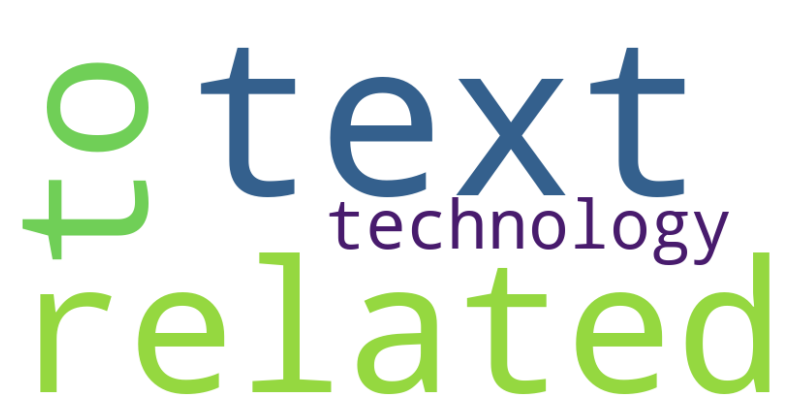

In [277]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


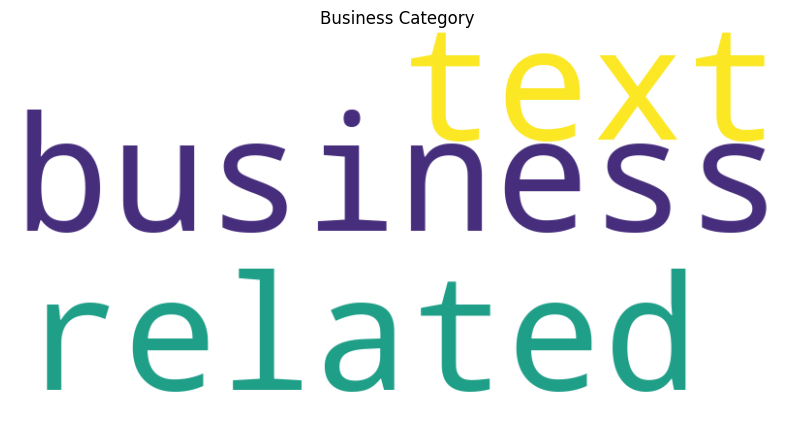

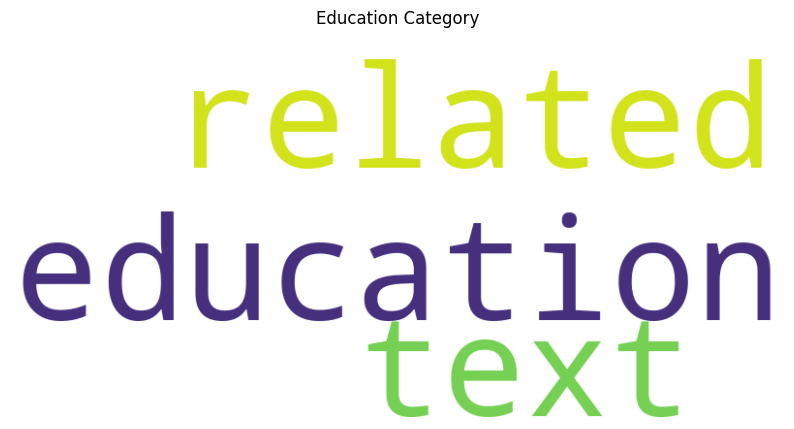

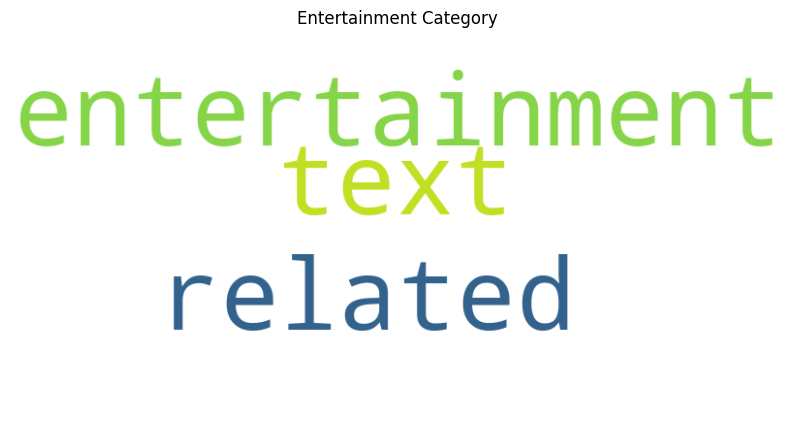

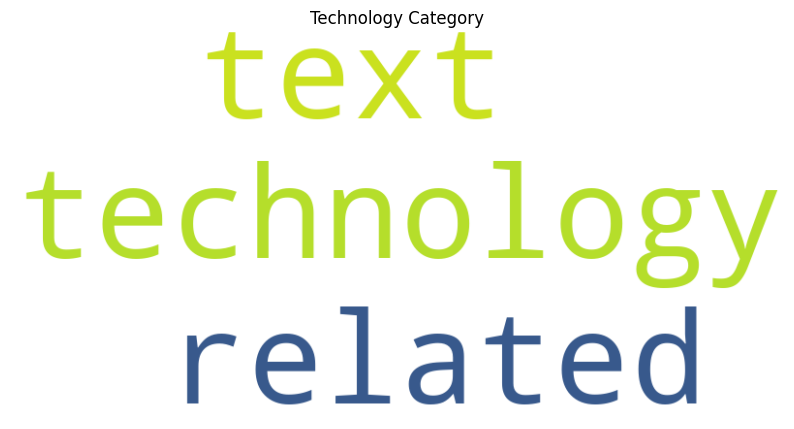

In [278]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example data for each category (replace with your actual data)
business_text = "business related text here"
education_text = "education related text here"
entertainment_text = "entertainment related text here"
technology_text = "technology related text here"

# Function to generate and display word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display word clouds for each category
generate_word_cloud(business_text, 'Business Category')
generate_word_cloud(education_text, 'Education Category')
generate_word_cloud(entertainment_text, 'Entertainment Category')
generate_word_cloud(technology_text, 'Technology Category')


In [279]:
# Sentiment analysis (using textblob)
from textblob import TextBlob
sentiments = [TextBlob(doc).sentiment.polarity for doc in documents]

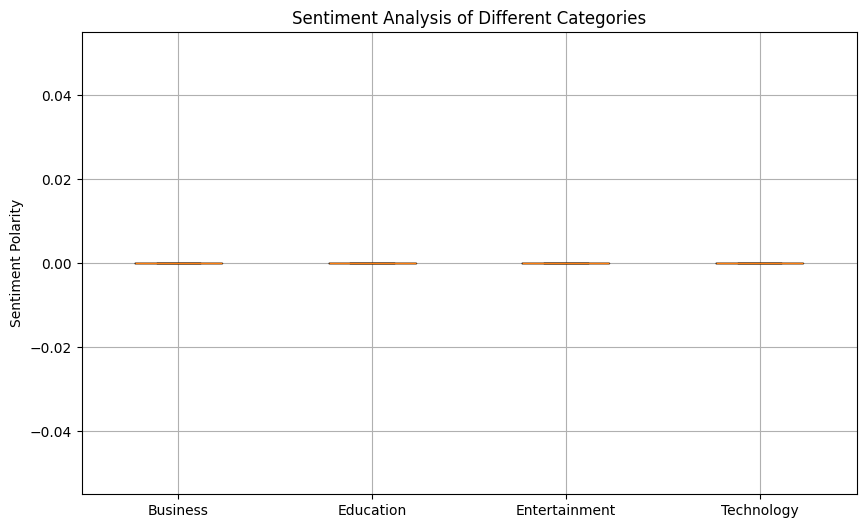

In [280]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Example documents for each category (replace with your actual data)
business_docs = [
    "Business document 1 text here",
    "Business document 2 text here",
    "Business document 3 text here"
]

education_docs = [
    "Education document 1 text here",
    "Education document 2 text here",
    "Education document 3 text here"
]

entertainment_docs = [
    "Entertainment document 1 text here",
    "Entertainment document 2 text here",
    "Entertainment document 3 text here"
]

technology_docs = [
    "Technology document 1 text here",
    "Technology document 2 text here",
    "Technology document 3 text here"
]

# Function to calculate sentiment polarity for each document
def calculate_sentiment(documents):
    return [TextBlob(doc).sentiment.polarity for doc in documents]

# Calculate sentiment polarity for each category
business_sentiments = calculate_sentiment(business_docs)
education_sentiments = calculate_sentiment(education_docs)
entertainment_sentiments = calculate_sentiment(entertainment_docs)
technology_sentiments = calculate_sentiment(technology_docs)

# Plotting the sentiments
categories = ['Business', 'Education', 'Entertainment', 'Technology']
sentiment_values = [
    business_sentiments,
    education_sentiments,
    entertainment_sentiments,
    technology_sentiments
]

plt.figure(figsize=(10, 6))
plt.boxplot(sentiment_values, labels=categories)
plt.title('Sentiment Analysis of Different Categories')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()


#### <a href=#cont>Back to Table of Contents</a>

---

## 6.Data Preprocessing <a class="anchor" id="chapter6"></a>

#### <a href=#cont>Back to Table of Contents</a>

---

## 7.Train-test splits <a class="anchor" id="chapter7"></a>

#### <a href=#cont>Back to Table of Contents</a>

---

## 8.Conclusion <a class="anchor" id="chapter8"></a>

## 9.References <a class="anchor" id="chapter9"></a>

#### <a href=#cont>Back to Table of Contents</a>

---